# chapter 3 : 2차원 데이터 정리

In [1]:
import numpy as np
import pandas as pd

In [2]:
%precision 3
pd.set_option('precision', 3)

In [3]:
df = pd.read_csv('../source/python_stat_sample-master/data/ch2_scores_em.csv',
                index_col = 'student number')


df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [4]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english': en_scores, 
                          'mathematics': ma_scores},
                         index = pd.Index(['A', 'B', 'C', 'D', 'E', 
                                          'F', 'G', 'H', 'I', 'J'], 
                                        name = 'student'))

scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## 3.1 두 데이터 사이의 관계를 나타내는 지표

### 3.1.1 공분산

In [5]:
summary_df = scores_df.copy()

summary_df['english_deviation'] = \
    summary_df ['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = \
    summary_df ['mathematics'] - summary_df['mathematics'].mean()

summary_df['product of deviation'] = \
    summary_df['english_deviation'] * summary_df['mathematics_deviation']

summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [6]:
summary_df['product of deviation'].mean()

62.8

In [7]:
# 영어 점수와 수학 점수는 양의 상관관계에 있다.

In [8]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)   # Numpy의 cov 함수는 행렬로 반환

cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [9]:
# 수학과 영어의 공분산
cov_mat[0, 1], cov_mat[1, 0]

(62.800000000000004, 62.800000000000004)

In [10]:
# 영어의 분산, 수학의 분산
cov_mat[0, 0], cov_mat[1, 1]

(86.0, 68.44000000000001)

In [11]:
# 확인
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

### 3.1.2 상관계수

In [12]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [13]:
np.corrcoef(en_scores, ma_scores)   # 상관행렬로 반환

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [14]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


## 3.2 2차원 데이터의 시각화

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

### 3.2.1 산점도

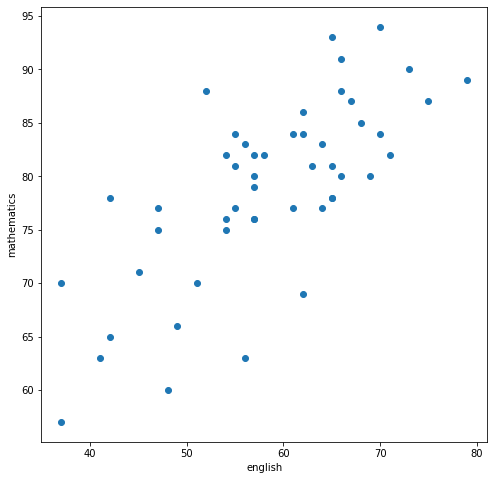

In [16]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

In [17]:
# seaborn으로 산점도 그리기
en_scores_sns = np.array(df['english'])
ma_scores_sns = np.array(df['mathematics'])

scores_df_sns = pd.DataFrame({'english': en_scores_sns, 
                          'mathematics': ma_scores_sns})

scores_df_sns

,english,mathematics
0,42,65
1,69,80
2,56,63
3,41,63
4,57,76
5,48,60
6,65,81
7,49,66
8,65,78
9,58,82


In [18]:
import seaborn as sns

<AxesSubplot:xlabel='english', ylabel='mathematics'>

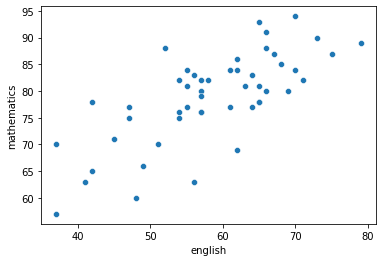

In [19]:
sns.scatterplot(x='english', y='mathematics', data=scores_df_sns)

### 3.2.2 회귀직선

In [20]:
# 계수 β_0과 β_1을 구한다.
poly_fit = np.polyfit(english_scores, math_scores, 1)   #(x ,y, degree=1)
#β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)   # n차 다항함수를 반환
# 괄호 안에는 계수의 array가 들어간다.

In [21]:
poly_fit

array([ 0.621, 42.601])

In [22]:
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다.
ys = poly_1d(xs)

In [23]:
xs

array([37.   , 37.857, 38.714, 39.571, 40.429, 41.286, 42.143, 43.   ,
       43.857, 44.714, 45.571, 46.429, 47.286, 48.143, 49.   , 49.857,
       50.714, 51.571, 52.429, 53.286, 54.143, 55.   , 55.857, 56.714,
       57.571, 58.429, 59.286, 60.143, 61.   , 61.857, 62.714, 63.571,
       64.429, 65.286, 66.143, 67.   , 67.857, 68.714, 69.571, 70.429,
       71.286, 72.143, 73.   , 73.857, 74.714, 75.571, 76.429, 77.286,
       78.143, 79.   ])

In [24]:
ys

array([65.594, 66.127, 66.659, 67.192, 67.725, 68.257, 68.79 , 69.323,
       69.855, 70.388, 70.92 , 71.453, 71.986, 72.518, 73.051, 73.584,
       74.116, 74.649, 75.182, 75.714, 76.247, 76.78 , 77.312, 77.845,
       78.378, 78.91 , 79.443, 79.975, 80.508, 81.041, 81.573, 82.106,
       82.639, 83.171, 83.704, 84.237, 84.769, 85.302, 85.835, 86.367,
       86.9  , 87.433, 87.965, 88.498, 89.031, 89.563, 90.096, 90.628,
       91.161, 91.694])

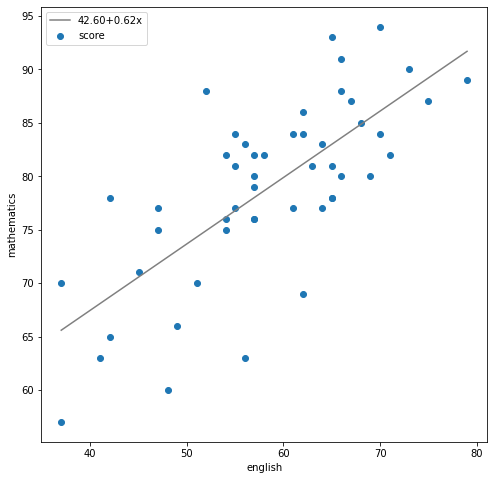

In [25]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray', 
       label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
# 범례 표시
ax.legend(loc='upper left')

plt.show()

<AxesSubplot:xlabel='english', ylabel='mathematics'>

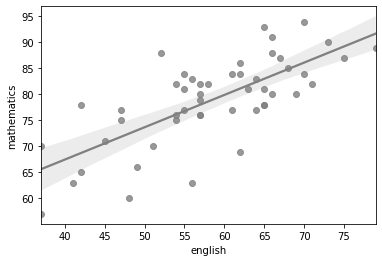

In [26]:
# seaborn으로 회귀직선 그리기
sns.regplot(x='english', y='mathematics', data=scores_df_sns, 
           color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

### 3.2.3 히트맵

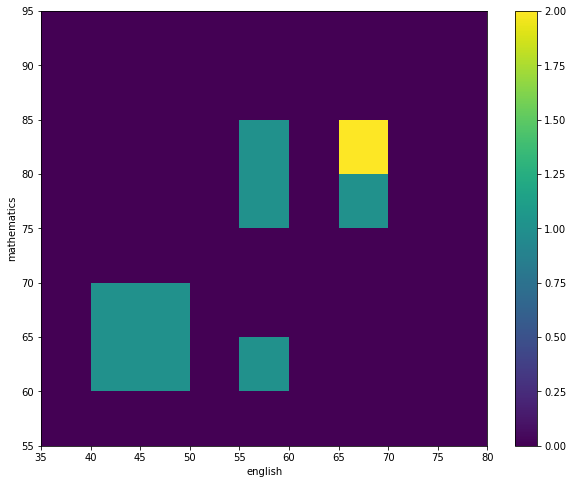

In [27]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(en_scores, ma_scores, 
             bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바 표시
fig.colorbar(c[3], ax=ax)   # 그림 오른쪽 바

plt.show()

## 3.3 앤스컴의 예

In [28]:
# npy 형식으로 저장된 Numpy array를 읽어 들인다.
anscombe_data = np.load('../source/python_stat_sample-master/data/ch3_anscombe.npy')

print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [29]:
anscombe_data

array([[[10.  ,  8.04],
        [ 8.  ,  6.95],
        [13.  ,  7.58],
        [ 9.  ,  8.81],
        [11.  ,  8.33],
        [14.  ,  9.96],
        [ 6.  ,  7.24],
        [ 4.  ,  4.26],
        [12.  , 10.84],
        [ 7.  ,  4.82],
        [ 5.  ,  5.68]],

       [[10.  ,  9.14],
        [ 8.  ,  8.14],
        [13.  ,  8.74],
        [ 9.  ,  8.77],
        [11.  ,  9.26],
        [14.  ,  8.1 ],
        [ 6.  ,  6.13],
        [ 4.  ,  3.1 ],
        [12.  ,  9.13],
        [ 7.  ,  7.26],
        [ 5.  ,  4.74]],

       [[10.  ,  7.46],
        [ 8.  ,  6.77],
        [13.  , 12.74],
        [ 9.  ,  7.11],
        [11.  ,  7.81],
        [14.  ,  8.84],
        [ 6.  ,  6.08],
        [ 4.  ,  5.39],
        [12.  ,  8.15],
        [ 7.  ,  6.42],
        [ 5.  ,  5.73]],

       [[ 8.  ,  6.58],
        [ 8.  ,  5.76],
        [ 8.  ,  7.71],
        [ 8.  ,  8.84],
        [ 8.  ,  8.47],
        [ 8.  ,  7.04],
        [ 8.  ,  5.25],
        [19.  , 12.5 ],
        [ 

In [30]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean', 'Y_variance', 
                              'X&Y_correlation', 'X&Y_regression line'])

for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']

stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


In [31]:
# 네 가지 데이터는 모두 동일한 것처럼 보인다. 하지만...

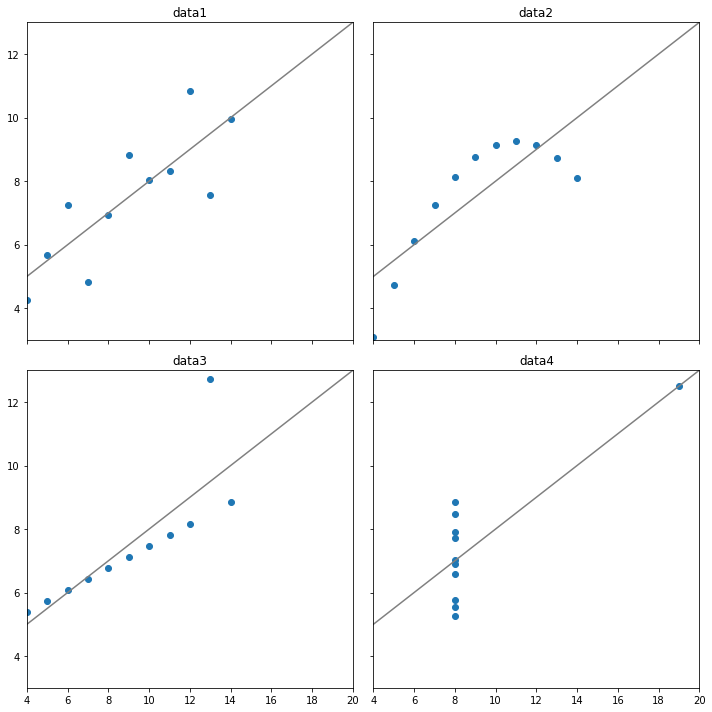

In [32]:
# 그래프를 그리기 위한 영역을 2×2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), 
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:, 0], data[:, 1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:, 0], data[:, 1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힌다.
plt.tight_layout()

plt.show()

In [33]:
# 앤스컴의 예 : 데이터를 분석할 때는 가능하면 그림을 그려야 한다.